In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [74]:
data_perp = pd.read_excel('data_26.xlsx', sheet_name=1, decimal=',')

data_perp = pd.DataFrame(data_perp[2:], dtype=float)
data_perp.columns=['U1', 'd1', 'U2', 'd2', 'U3', 'd3']
data_perp = data_perp.sort_values('d1')
data_perp

,U1,d1,U2,d2,U3,d3
23,5.0,-8.0,150.0,-8.0,36.0,-8.0
22,180.0,-7.0,200.0,-7.0,96.0,-7.0
21,250.0,-6.0,220.0,-6.0,108.0,-6.0
20,500.0,-5.0,250.0,-5.0,111.0,-5.0
19,600.0,-4.0,320.0,-4.0,117.0,-4.0
18,620.0,-3.0,340.0,-3.0,120.0,-3.0
17,650.0,-2.0,360.0,-2.0,121.5,-2.0
16,670.0,-1.0,370.0,-1.0,123.0,-1.0
15,700.0,0.0,380.0,0.0,126.0,0.0
14,720.0,1.0,385.0,1.0,132.0,1.0


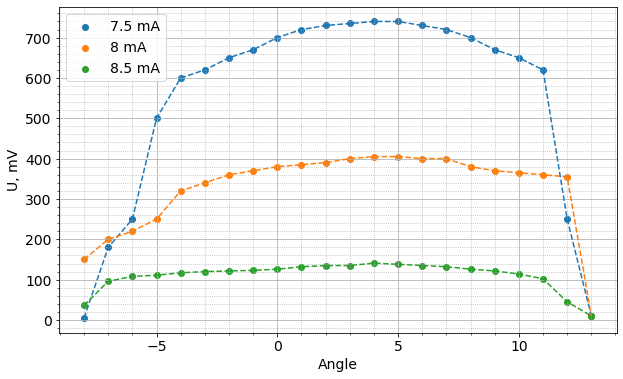

In [77]:
plt.figure(figsize=(10,6))

plt.rc('font', size=14)  

plt.scatter(data_perp.d1, data_perp.U1, label='7.5 mA')
plt.plot(data_perp.d1, data_perp.U1, linestyle='--')

plt.scatter(data_perp.d1, data_perp.U2, label='8 mA')
plt.plot(data_perp.d1, data_perp.U2, linestyle='--')

plt.scatter(data_perp.d1, data_perp.U3, label='8.5 mA')
plt.plot(data_perp.d1, data_perp.U3, linestyle='--')

plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.grid()

plt.ylabel('U, mV')
plt.xlabel('Angle')

plt.legend()

plt.savefig('pictures/g1.png', dpi=400)
plt.show()

In [84]:
data_par = pd.read_excel('data_26.xlsx', sheet_name=2, decimal=',')

data_par = pd.DataFrame(data_par[2:], dtype=float)
data_par.columns=['U1', 'd1', 'U2', 'd2']
data_par = data_par.sort_values('d1')

data_par

,U1,d1,U2,d2
18,0.0,-4.0,0.0,-4.0
17,20.0,-3.0,30.0,-3.0
16,80.0,-2.0,100.0,-2.0
15,100.0,-1.0,130.0,-1.0
14,200.0,0.0,220.0,0.0
13,300.0,1.0,380.0,1.0
12,360.0,2.0,480.0,2.0
11,430.0,3.0,640.0,3.0
10,460.0,4.0,780.0,4.0
9,450.0,5.0,800.0,5.0


In [89]:
def fun(x, U0, xc, w, A):
    return U0 + A/(w * np.sqrt(np.pi/2)) * np.exp(-2 * (x - xc)**2 / (w)**2)

In [105]:
opt1, cov1 = curve_fit(fun, np.array(data_par.d1), np.array(data_par.U1))


opt2, cov2 = curve_fit(fun, np.array(data_par.d1), np.array(data_par.U2), p0=[17.9, 4, 5, 5000])

params 8: -1.255E+01, 4.106E+00, -6.561E+00, -3.819E+03
params 8.5: 1.792E+01, 4.452E+00, 5.363E+00, 5.114E+03


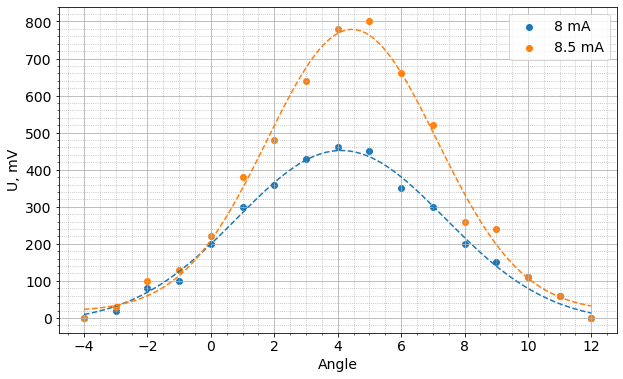

In [108]:
plt.figure(figsize=(10,6))

plt.rc('font', size=14) 

d = np.linspace(min(data_par.d1), max(data_par.d1), 100)

plt.scatter(data_par.d1, data_par.U1, label='8 mA')
plt.plot(d, fun(d, *opt1) , linestyle='--')
print('params 8: {:.3E}, {:.3E}, {:.3E}, {:.3E}'.format(*opt1))

plt.scatter(data_par.d1, data_par.U2, label='8.5 mA')
plt.plot(d, fun(d, *opt2) , linestyle='--')
print('params 8.5: {:.3E}, {:.3E}, {:.3E}, {:.3E}'.format(*opt2))

plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.grid()

plt.ylabel('U, mV')
plt.xlabel('Angle')

plt.legend()

plt.savefig('pictures/g2.png', dpi=400)
plt.show()

In [141]:
res = np.concatenate((opt1, np.sqrt(np.diag(cov1)))).reshape(2,4).T
output = pd.DataFrame(res, columns=['coef_values', 'standart_error'])
output.insert(0, value = ['U0', 'A', 'xc', 'w'], column = 'coeffs')

latex_output = output.to_latex(index = False, position = 'h', caption = r'Коэффициенты аппроксимации $I=8\; mA$', label = 'coeffs_table')
print('\n\nLatex code of coeffs table 8 mA: \n')
print(latex_output)

with open('coeffs_table_8mA.tex', 'w') as tf:
    tf.write(latex_output)



Latex code of coeffs table 8 mA: 

\begin{table}[h]
\centering
\caption{Коэффициенты аппроксимации $I=8\; mA$}
\label{coeffs_table}
\begin{tabular}{lrr}
\toprule
coeffs &  coef\_values &  standart\_error \\
\midrule
    U0 &   -12.549157 &       16.503157 \\
     A &     4.106410 &        0.076892 \\
    xc &    -6.560648 &        0.327160 \\
     w & -3818.948496 &      285.046729 \\
\bottomrule
\end{tabular}
\end{table}



/var/folders/bw/2f3knnw55njfknhq6g4hcfkr0000gn/T/ipykernel_6045/263772917.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_output = output.to_latex(index = False, position = 'h', caption = r'Коэффициенты аппроксимации $I=8\; mA$', label = 'coeffs_table')


In [142]:
res = np.concatenate((opt2, np.sqrt(np.diag(cov2)))).reshape(2,4).T
output = pd.DataFrame(res, columns=['coef_values', 'standart_error'])
output.insert(0, value = ['U0', 'A', 'xc', 'w'], column = 'coeffs')

latex_output = output.to_latex(index = False, position = 'h', caption = r'Коэффициенты аппроксимации $I=8.5\; mA$', label = 'coeffs_table')
print('\n\nLatex code of coeffs table 8.5 mA: \n')
print(latex_output)

with open('coeffs_table_8.5mA.tex', 'w') as tf:
    tf.write(latex_output)



Latex code of coeffs table 8.5 mA: 

\begin{table}[h]
\centering
\caption{Коэффициенты аппроксимации $I=8.5\; mA$}
\label{coeffs_table}
\begin{tabular}{lrr}
\toprule
coeffs &  coef\_values &  standart\_error \\
\midrule
    U0 &    17.921781 &       20.133823 \\
     A &     4.451687 &        0.081142 \\
    xc &     5.363032 &        0.252814 \\
     w &  5113.828306 &      313.554494 \\
\bottomrule
\end{tabular}
\end{table}



/var/folders/bw/2f3knnw55njfknhq6g4hcfkr0000gn/T/ipykernel_6045/2997505008.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_output = output.to_latex(index = False, position = 'h', caption = r'Коэффициенты аппроксимации $I=8.5\; mA$', label = 'coeffs_table')


In [147]:
residuals1 = np.array(data_par.U1) - fun(data_par.d1,*opt1)
fres1 = sum(residuals1**2)
S_e1 = np.sqrt(fres1/len(d))
S_e1

6.68078279194893

In [148]:
residuals1 = np.array(data_par.U2) - fun(data_par.d1,*opt2)
fres1 = sum(residuals1**2)
S_e2 = np.sqrt(fres1/len(d))
S_e2

12.794371346823016